In [20]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Cargar el dataset
ruta_dataset = "../../Limpieza/data/df_unificado_limpio_imputado.csv"
df = pd.read_csv(ruta_dataset)

In [22]:
# Revisar la estructura del dataset
print(f"Estructura del dataset:\n{df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917885 entries, 0 to 917884
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   AÑO                           917885 non-null  int64  
 1   TRIMESTRE                     917885 non-null  float64
 2   PROVEEDOR                     917885 non-null  object 
 3   CÓDIGO DANE                   917885 non-null  float64
 4   DEPARTAMENTO                  917885 non-null  object 
 5   CÓDIGO DANE.1                 917885 non-null  float64
 6   MUNICIPIO                     917885 non-null  object 
 7   SEGMENTO                      917885 non-null  object 
 8   TECNOLOGÍA                    917885 non-null  object 
 9   VELOCIDAD BAJADA              917885 non-null  float64
 10  VELOCIDAD SUBIDA              917885 non-null  float64
 11  No. ACCESOS FIJOS A INTERNET  917885 non-null  int64  
 12  Latitud                       917885 non-nul

In [23]:
# Filtrar datos para garantizar que VELOCIDAD BAJADA y VELOCIDAD SUBIDA sean mayores a 0
df = df[(df['VELOCIDAD BAJADA'] > 0) & (df['VELOCIDAD SUBIDA'] > 0)]


In [24]:
# Revisar la forma del dataset después del filtrado
print(f"Total de registros después del filtrado: {len(df)}")

Total de registros después del filtrado: 916830


In [25]:
# Separar variables predictoras y objetivo
X = df[['AÑO', 'TRIMESTRE', 'VELOCIDAD BAJADA', 'VELOCIDAD SUBIDA', 'Latitud', 'Longitud']]
y = df['No. ACCESOS FIJOS A INTERNET']

In [26]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Revisar la forma de los conjuntos
print(f"Forma de X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Forma de X_test: {X_test.shape}, y_test: {y_test.shape}")

Forma de X_train: (733464, 6), y_train: (733464,)
Forma de X_test: (183366, 6), y_test: (183366,)


In [28]:
# Entrenar el modelo Random Forest Regressor
modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
# Hacer predicciones y evaluar el modelo
y_pred = modelo_rf.predict(X_test)

In [30]:
# Calcular el error cuadrático medio (MSE) y el coeficiente R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [31]:
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

Error cuadrático medio (MSE): 215128.71689917028
Coeficiente de determinación (R²): 0.22109082359539067


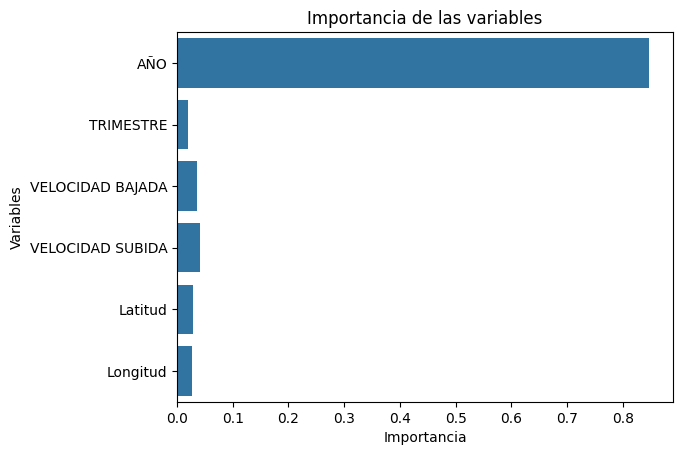

In [32]:
# Mostrar la importancia de las variables
importancias = modelo_rf.feature_importances_
sns.barplot(x=importancias, y=X.columns)
plt.title('Importancia de las variables')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.show()

# Conclusiones del modelo Random Forest

1. **Desempeño del modelo:**
   - El modelo tiene un Error Cuadrático Medio (MSE) de **215,128**, lo que representa una mejora significativa en comparación con la regresión lineal.
   - El Coeficiente de Determinación (\(R^2\)) de **0.22** indica que el modelo es capaz de explicar el **22% de la variabilidad en los datos**. Aunque es una mejora sobre el modelo anterior, aún queda espacio para mejorar.

2. **Importancia de las variables:**
   - La variable **AÑO** es, con diferencia, la más importante para el modelo. Esto sugiere que los accesos fijos a internet están influenciados principalmente por el año en que se registran los datos.
   - Las variables relacionadas con **velocidad de bajada y subida**, así como la **ubicación geográfica** (latitud y longitud), tienen una contribución marginal al modelo.

3. **Observaciones:**
   - El modelo podría beneficiarse de:
     - Incluir nuevas variables explicativas que capturen factores relevantes como nivel socioeconómico, infraestructura de telecomunicaciones o políticas gubernamentales.
     - Refinar los hiperparámetros del modelo Random Forest para mejorar su precisión.
     - Considerar técnicas avanzadas como modelos de boosting o redes neuronales.

4. **Siguientes pasos:**
   - Evaluar la calidad de los datos para asegurarse de que no haya ruido o inconsistencias que afecten el modelo.
   - Explorar la ingeniería de características para mejorar la relevancia de las variables menos importantes.
   - Comparar este modelo con otros algoritmos, como **Gradient Boosting** o **XGBoost**, para identificar mejoras potenciales.
